#### Scaled sound pressure level in decibels

In [1]:
# importing required libraries:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [2]:
# loading the data:
data = pd.read_excel('dataset.xlsx')
data.columns = ['frequency', 'angle', 'chord_length', 'free_stream_velocity', 'ss_dis_thickness', 'scaled_sound_press_lvl']
data.head(3)

,frequency,angle,chord_length,free_stream_velocity,ss_dis_thickness,scaled_sound_press_lvl
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591


In [3]:
data.size

9012

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frequency               1502 non-null   int64  
 1   angle                   1502 non-null   float64
 2   chord_length            1502 non-null   float64
 3   free_stream_velocity    1502 non-null   float64
 4   ss_dis_thickness        1502 non-null   float64
 5   scaled_sound_press_lvl  1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [5]:
data.describe()

,frequency,angle,chord_length,free_stream_velocity,ss_dis_thickness,scaled_sound_press_lvl
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [6]:
# looking for NaN values:
data.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
ss_dis_thickness          0
scaled_sound_press_lvl    0
dtype: int64

array([[<AxesSubplot:title={'center':'frequency'}>,
        <AxesSubplot:title={'center':'angle'}>],
       [<AxesSubplot:title={'center':'chord_length'}>,
        <AxesSubplot:title={'center':'free_stream_velocity'}>],
       [<AxesSubplot:title={'center':'ss_dis_thickness'}>,
        <AxesSubplot:title={'center':'scaled_sound_press_lvl'}>]],
      dtype=object)

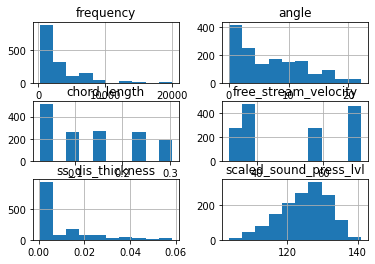

In [7]:
# relation between features:
data.hist()

In [8]:
# correlation matrix:
corr_matrix = data.corr()
corr_matrix['scaled_sound_press_lvl'].sort_values(ascending = False)

scaled_sound_press_lvl    1.000000
free_stream_velocity      0.125003
angle                    -0.156027
chord_length             -0.236657
ss_dis_thickness         -0.312632
frequency                -0.390686
Name: scaled_sound_press_lvl, dtype: float64

In [9]:
# dividing data:
X = data[['frequency', 'angle', 'chord_length', 'free_stream_velocity', 'ss_dis_thickness']]
Y = data['scaled_sound_press_lvl']

In [10]:
# splitting into training and testing dataset with test_size = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [11]:
# creating a linear regression model:
lr = LinearRegression()

In [12]:
# fitting the training dataset into model:
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# predicting the results on testing dataset:
predictions = lr.predict(X_test)

In [14]:
# calculating mean absolute error
mae = mean_absolute_error(predictions, Y_test)
print("Mean Absolute Error: " , round(mae, 2))

Mean Absolute Error:  3.71


In [15]:
# comparing original and predicted values:
comparison = pd.DataFrame({'Default': Y_test, 'Predicted': predictions})
comparison.head(10)

,Default,Predicted
1218,126.097,123.131061
9,117.151,118.281104
1411,139.428,125.501527
1079,124.222,124.671855
901,121.783,124.033402
202,123.780,129.215046
122,117.309,119.073992
983,130.026,133.319898
687,114.729,119.458791
506,123.807,125.184898
